# Instrucciones (kinda)

El codigo funciona con Python 3.7 pero colab tiene 3.6.9, aun asi es posible conectarse a un kernel local :D 

In [1]:
#!pip install git+https://gitlab.com/psyrax/turnips.git
#Prueba de downgrade [python que no funciono] (tambien podemos intentar hacer nuestro fork o implementacion)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gspread_pandas
from gspread_pandas import Spread, Client
gSpreadConfig = gspread_pandas.conf.get_config(conf_dir="./", file_name="client_id.json")
import json

In [3]:
spread = Spread('naboHolding',config=gSpreadConfig)
naboDF = spread.sheet_to_df()

In [4]:
naboDF.fillna(0).head()

,Isla,Precio Nabo,Lunes AM,Lunes PM,Martes AM,Martes PM
Humano,,,,,,
Victor,Woakanda,108,143,,,
Selene,luna,102,83,146,,
Psyrax,IslaBonita,101,79,75,,
Ale,PambazoBay,92,48,,,
Mariana,Hirome,94,83,,,


In [5]:
archipielagoData = {}
archipielagoData['islands'] = {}
for index,row in naboDF.iterrows():
    archipielagoData['islands'][row['Isla']] = {
      "timeline" : {
          "Sunday_AM" : row['Precio Nabo'],
      }
    }
    if row['Lunes AM']:
        archipielagoData['islands'][row['Isla']]['timeline']['Monday_AM'] = row['Lunes AM']

In [6]:
jsonDataTurnips = json.dumps(archipielagoData)
print(jsonDataTurnips)

{"islands": {"Woakanda": {"timeline": {"Sunday_AM": "108", "Monday_AM": "143"}}, "luna": {"timeline": {"Sunday_AM": "102", "Monday_AM": "83"}}, "IslaBonita": {"timeline": {"Sunday_AM": "101", "Monday_AM": "79"}}, "PambazoBay": {"timeline": {"Sunday_AM": "92", "Monday_AM": "48"}}, "Hirome": {"timeline": {"Sunday_AM": "94", "Monday_AM": "83"}}, "Sebastovia": {"timeline": {"Sunday_AM": "96", "Monday_AM": "103"}}, "Tuli": {"timeline": {"Sunday_AM": "110", "Monday_AM": "150"}}, "Manduzz": {"timeline": {"Sunday_AM": "110"}}, "Pau Hana": {"timeline": {"Sunday_AM": "103", "Monday_AM": "74"}}, "Val Hallen": {"timeline": {"Sunday_AM": "105"}}, "Sulskaumer": {"timeline": {"Sunday_AM": "100", "Monday_AM": "118"}}, "Lanai": {"timeline": {"Sunday_AM": "102", "Monday_AM": "88"}}, "Endor": {"timeline": {"Sunday_AM": "102", "Monday_AM": "55"}}, "Iztaparata": {"timeline": {"Sunday_AM": "110", "Monday_AM": "90"}}}}


In [7]:
from turnips import archipelago
import json
islands = archipelago.Archipelago.load_json(jsonDataTurnips)

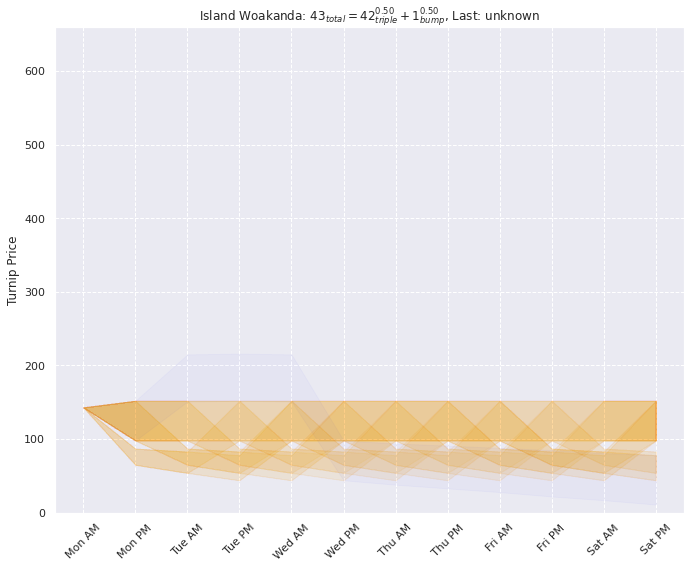

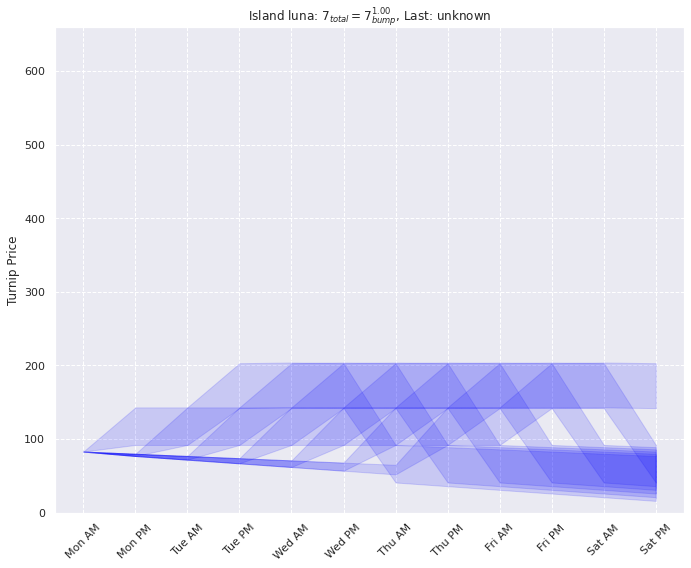

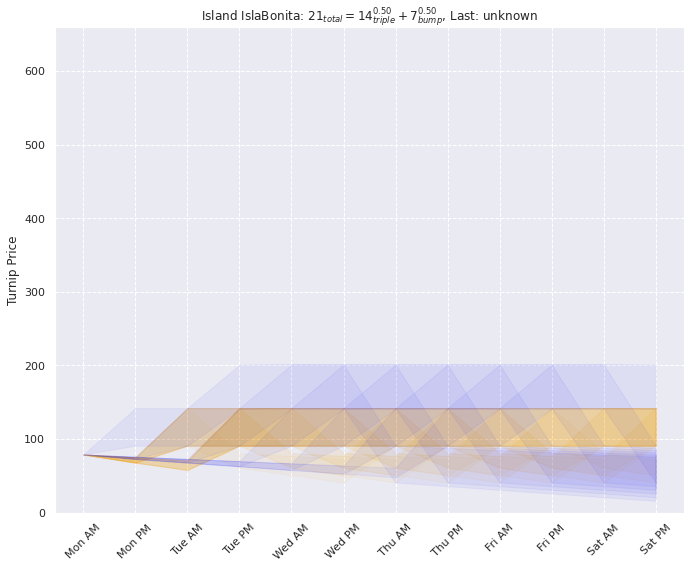

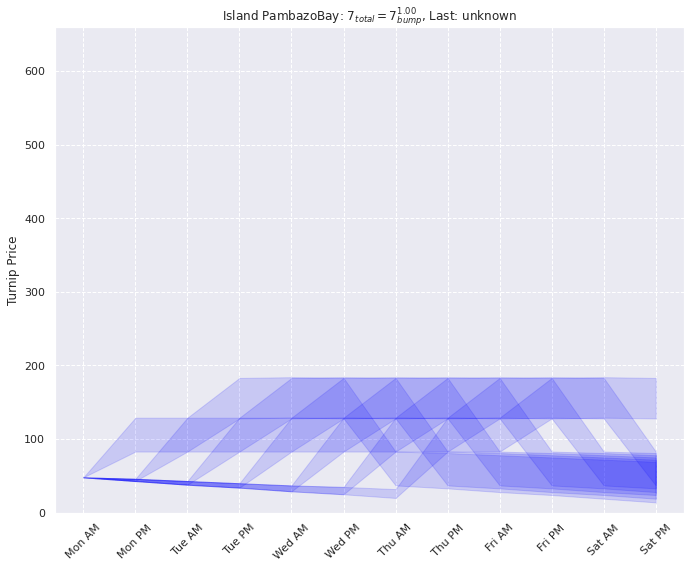

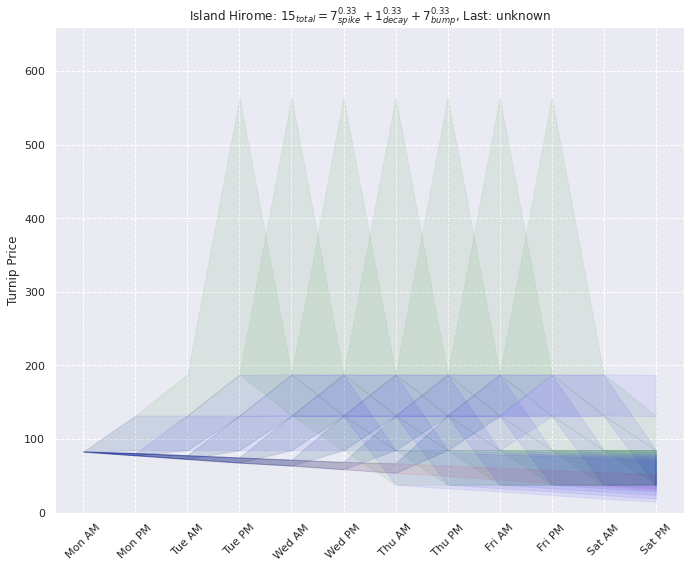

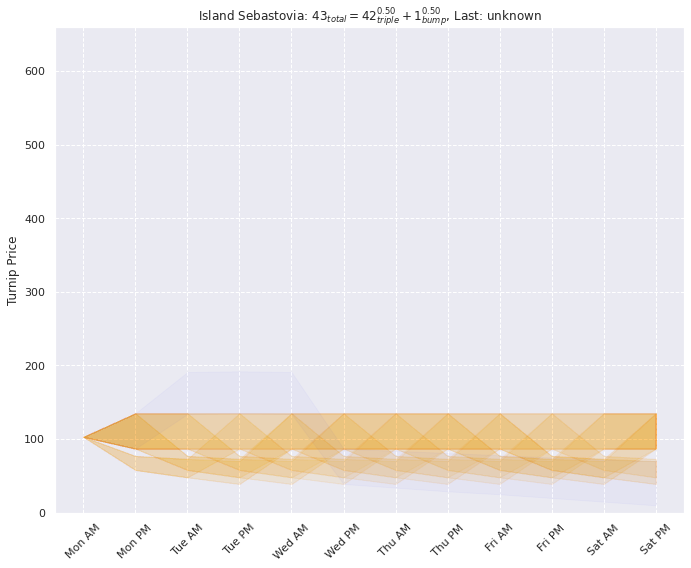

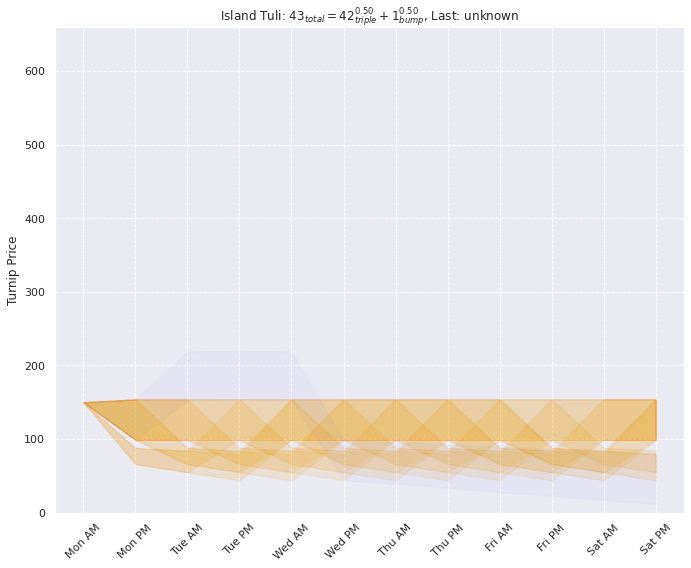

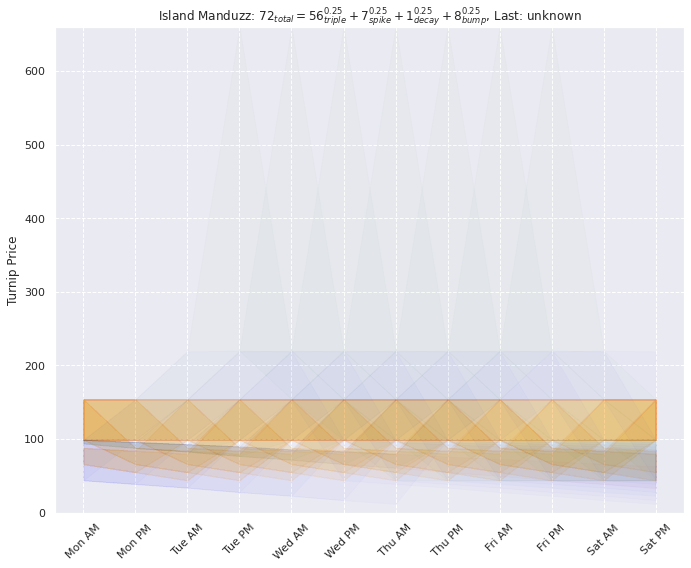

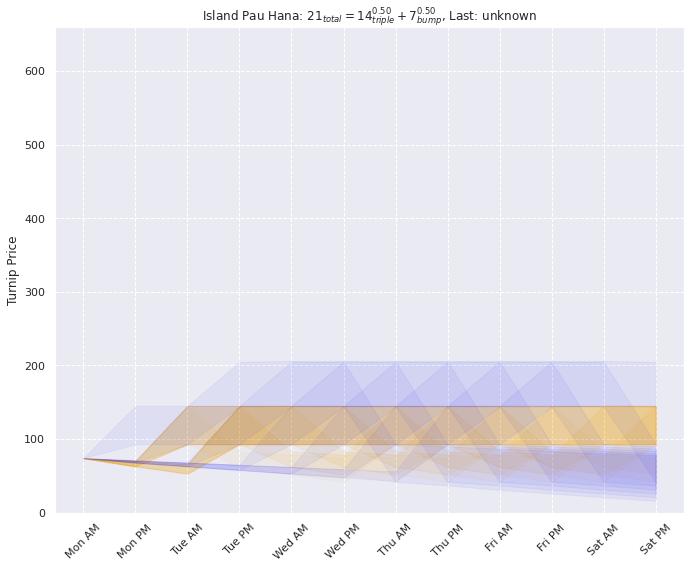

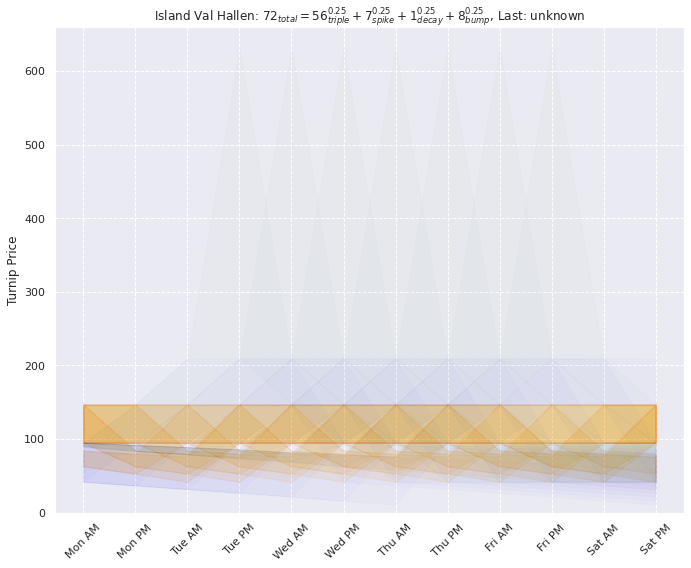

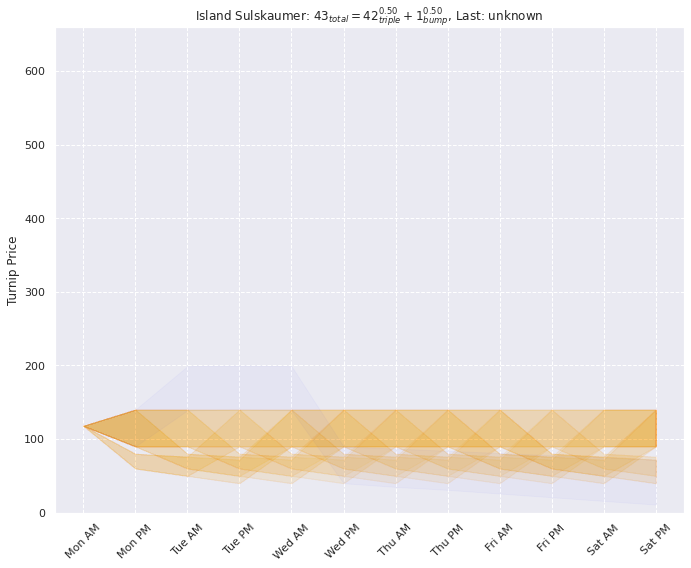

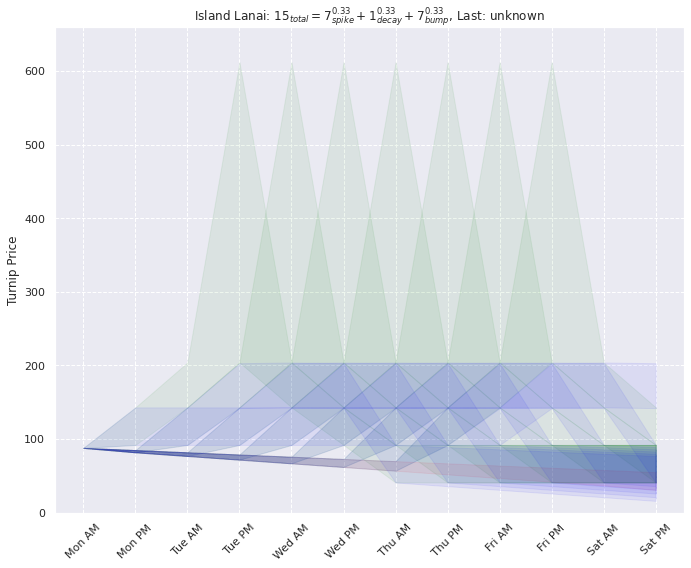

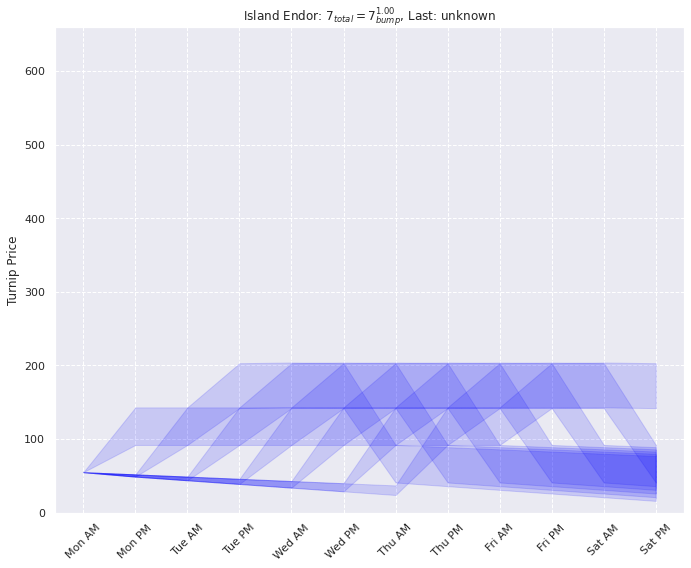

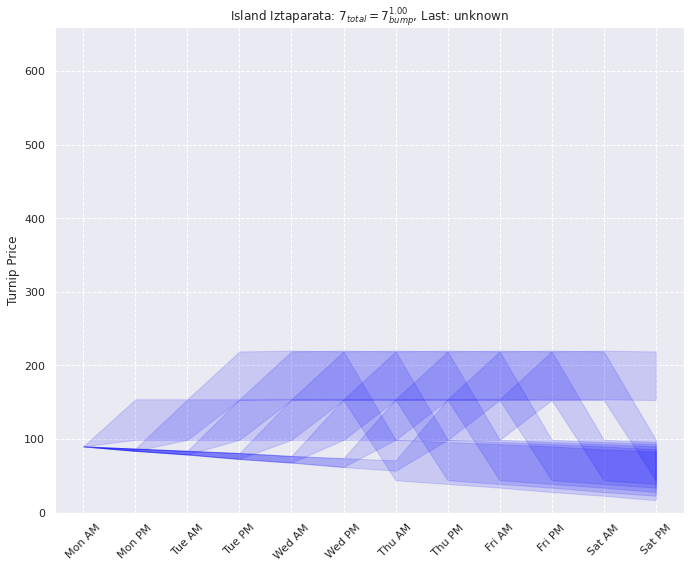

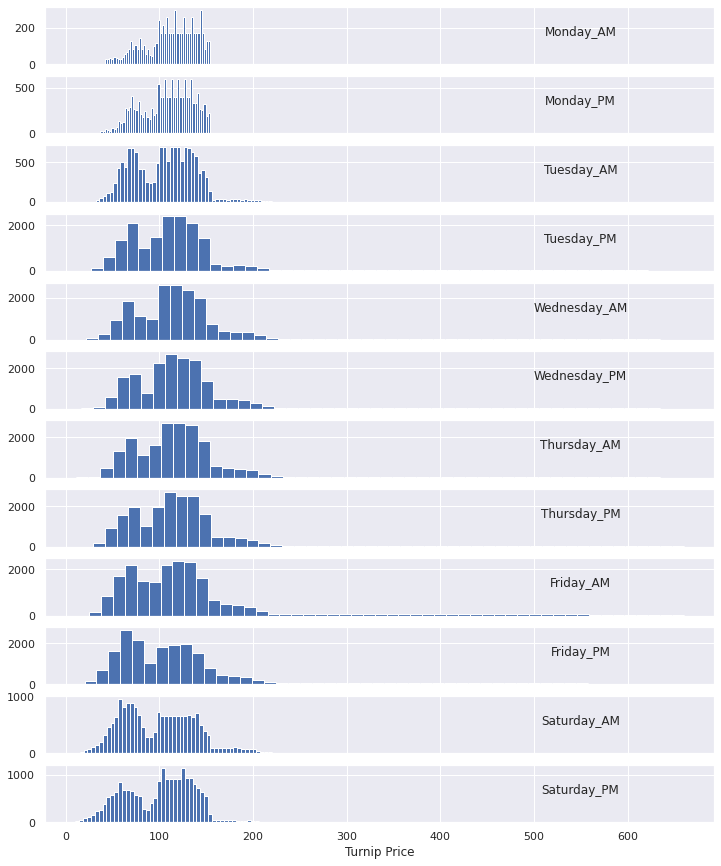

In [8]:
islands.plot()

In [9]:
islands.summary()

Woakanda
-------------------------------------------

Meta-Analysis: 
total possible models: 43
----------
Triple Model Analyses:
  42 model(s) remaining
  price: 108
  - phase1: 1
    - decay1: 2
      phase2: [1, 6]
    - decay1: 3
      phase2: [1, 6]
  - phase1: 2
    - decay1: 2
      phase2: [1, 5]
    - decay1: 3
      phase2: [1, 5]
  - phase1: 3
    - decay1: 2
      phase2: [1, 4]
    - decay1: 3
      phase2: [1, 4]
  - phase1: 4
    - decay1: 2
      phase2: [1, 3]
    - decay1: 3
      phase2: [1, 3]
  - phase1: 5
    - decay1: 2
      phase2: [1, 2]
    - decay1: 3
      phase2: [1, 2]
  - phase1: 6
    phase2: 1
    decay1: [2, 3]

  Summary: 
    Time          Price                   Likely                  Odds  
    Monday_AM:    143;                    143;                    (100.00%)
    Monday_PM:    {[65, 87], [98, 152]};  [98, 152];              (85.67%)
    Tuesday_AM:   {[54, 87], [98, 152]};  [65, 83];               (24.73%)
    Tuesday_PM:   {[44, 87], [98, 


Meta-Analysis: 
total possible models: 21
----------
Triple Model Analyses:
  14 model(s) remaining
  phase1: 0
  price: 103
  - decay1: 2
    phase2: [1, 7]
  - decay1: 3
    phase2: [1, 7]

  Summary: 
    Time          Price                   Likely                  Odds  
    Monday_AM:    74;                     74;                     (100.00%)
    Monday_PM:    [63, 70];               [63, 70];               (100.00%)
    Tuesday_AM:   {[53, 66], [93, 145]};  {[53, 66], [93, 145]};  (100.00%)
    Tuesday_PM:   {[62, 83], [93, 145]};  [93, 145];              (96.91%)
    Wednesday_AM: {[52, 83], [93, 145]};  [93, 145];              (89.01%)
    Wednesday_PM: {[42, 83], [93, 145]};  [93, 145];              (78.07%)
    Thursday_AM:  {[42, 83], [93, 145]};  [93, 145];              (78.07%)
    Thursday_PM:  {[42, 83], [93, 145]};  [93, 145];              (78.07%)
    Friday_AM:    {[42, 83], [93, 145]};  [93, 145];              (78.07%)
    Friday_PM:    {[42, 83], [93, 145]};  [9

    Monday_AM:    [42, 154];              {103, 118, 143};        (6.00%)
    Monday_PM:    [37, 154];              [99, 129];              (43.27%)
    Tuesday_AM:   [32, 220];              73;                     (1.19%)
    Tuesday_PM:   [27, 660];              {[128, 129], 132};      (3.12%)
    Wednesday_AM: [22, 660];              132;                    (1.08%)
    Wednesday_PM: [16, 660];              132;                    (1.10%)
    Thursday_AM:  [11, 660];              132;                    (1.07%)
    Thursday_PM:  [29, 660];              132;                    (1.05%)
    Friday_AM:    [25, 660];              [66, 70];               (4.71%)
    Friday_PM:    [20, 660];              [66, 67];               (2.34%)
    Saturday_AM:  [15, 220];              66;                     (1.20%)
    Saturday_PM:  [10, 219];              99;                     (1.16%)
--------------------------------------------------------------------------------


In [10]:
islandsDFData = {}
archipielagoDFs= []
for island in islands.islands:
    if islandsDFData.get(island.name) is None:
        islandsDFData[island.name] = {}
    islandsDFData[island.name].update(island.model_group.histogram())
    for histogram in islandsDFData[island.name]:
        df = pd.DataFrame.from_dict(islandsDFData[island.name][histogram], orient='index').reset_index().rename(columns={'index':'price', 0:'count'})
        df['selling_time'] = str(histogram)
        df['island'] = island.name
        archipielagoDFs.append(df)

In [11]:
archDf = pd.concat(archipielagoDFs, ignore_index=True)
labels = ['Poco probable','Nada probable','Probable','Muy probable']
archDf['rangoPrecio'] = pd.cut(archDf['count'], 4, labels=labels)
priceCutLabels = ['0-100', '100-200', '200-300', '300-400', '500-600', '600+']
archDf['priceCut'] = pd.cut(archDf['price'], 6, labels=priceCutLabels)
archDf['count'].fillna(0, inplace=True)

In [12]:
spread.df_to_sheet(archDf, index=False, sheet='10May-16MayData', replace=True)

In [13]:
max_probable = archDf[archDf['rangoPrecio'] == "Muy probable"]['price'].max()
print(max_probable)
min_probable  = archDf[archDf['rangoPrecio'] == "Muy probable"]['price'].min()
print(min_probable)

154
95


In [14]:
groupedCounts = archDf.groupby(['rangoPrecio', 'priceCut', 'selling_time'])['count'].sum().reset_index()
groupedCounts['percentage'] = groupedCounts['count'] / groupedCounts['count'].sum()
groupedCounts['count'].fillna(0, inplace=True)
groupedCounts['percentage'].fillna(0, inplace=True)

In [15]:
spread.df_to_sheet(groupedCounts, index=False, sheet='10May-16MayDataGrouped', replace=True)

In [16]:
groupedCounts[(groupedCounts['rangoPrecio'] == 'Muy probable') | (groupedCounts['rangoPrecio'] == 'Probable')].head(20)

,rangoPrecio,priceCut,selling_time,count,percentage
168,Probable,0-100,Friday_AM,2404.0,0.011371
169,Probable,0-100,Friday_PM,1442.0,0.006821
170,Probable,0-100,Monday_AM,1892.0,0.008949
171,Probable,0-100,Monday_PM,5798.0,0.027425
172,Probable,0-100,Saturday_AM,3348.0,0.015837
173,Probable,0-100,Saturday_PM,4866.0,0.023017
174,Probable,0-100,Thursday_AM,1632.0,0.007720
175,Probable,0-100,Thursday_PM,1634.0,0.007729
176,Probable,0-100,Tuesday_AM,2438.0,0.011532
177,Probable,0-100,Tuesday_PM,1734.0,0.008202


In [17]:
groupedCounts[(groupedCounts['rangoPrecio'] == 'Nada probable') | (groupedCounts['rangoPrecio'] == 'Poco probable')].head(20)

,rangoPrecio,priceCut,selling_time,count,percentage
0,Poco probable,0-100,Friday_AM,4022.0,0.019025
1,Poco probable,0-100,Friday_PM,4601.0,0.021763
2,Poco probable,0-100,Monday_AM,579.0,0.002739
3,Poco probable,0-100,Monday_PM,2082.0,0.009848
4,Poco probable,0-100,Saturday_AM,4327.0,0.020467
5,Poco probable,0-100,Saturday_PM,6432.0,0.030424
6,Poco probable,0-100,Thursday_AM,3544.0,0.016764
7,Poco probable,0-100,Thursday_PM,3965.0,0.018755
8,Poco probable,0-100,Tuesday_AM,2535.0,0.011991
9,Poco probable,0-100,Tuesday_PM,2340.0,0.011069
